## Name of the Project : House Price Prediction

### Description : 
This is the project to build a model which predict the house price of the houses in the Boston city in US.

### Description of the dataset:



Dataset has information about the house prices in the Boston city of US.

<b>File Format :</b>csv
    
<b>Rows :</b>614
    
<b>Columns :</b>14

<b>Target Variable :</b>MEDV

### Attribute Information :

Boston House Price dataset has 14 features and their description is given as follows:

<b>CRIM</b> per capita crime rate by town

<b>ZN</b> proportion of residential land zoned for lots over 25,000 sq.ft.

<b>INDUS</b> proportion of non-retail business acres per town

<b>CHAS</b> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

<b>NOX</b> nitric oxides concentration (parts per 10 million)

<b>RM</b> average number of rooms per dwelling

<b>AGE</b> proportion of owner-occupied units built prior to 1940

<b>DIS</b> weighted distances to five Boston employment centres

<b>RAD</b> index of accessibility to radial highways

<b>TAX</b> full-value property-tax rate per dollar 10,000.

<b>PTRATIO</b> pupil-teacher ratio by town

<b>B</b> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

<b>LSTAT %</b> lower status of the population

<b>MEDV</b> Median value of owner-occupied homes in $1000's



### Objective :
To build a model which predicts the house price of the houses present in the Boston city of US.

### Constraints :
1.Acceptable with little latency.

2.Need good Exploratory Data Analysis.

### Type of Machine Learning Problem :
Multiple Linear Regression

### Performace Metrics :
Try with as many as possible metrics.

1.MeanSquare Error(MSE)

2.Mean Absolute Error(MAE)

3.Root Mean Square Error(RMSE)

4.R Square

5.Adjusted R Square



### Importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the data from csv :

In [2]:
data=pd.read_csv('D:\Projects\House_Price_Prediction/HousingData.csv')

In [3]:
# Shape of the dataframe

data.shape

(506, 14)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Checking for Number of NaN values in each column:

In [5]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

#### Observation :

There are some columns which have NaN values.We can handle NaN values.

### Handling NaN values :

In [6]:
data['CRIM']=data['CRIM'].fillna(data['CRIM'].median())
data['ZN']=data['ZN'].fillna(data['ZN'].median())
data['INDUS']=data['INDUS'].fillna(data['INDUS'].median())
data['CHAS']=data['CHAS'].fillna(data['CHAS'].median())
data['AGE']=data['AGE'].fillna(data['AGE'].median())
data['LSTAT']=data['LSTAT'].fillna(data['LSTAT'].median())

#### Checking NaN values after handling NaN values :

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Observation :

All NaN values are handled and there are no NaN values.

### Checking the data types of the columns :

In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### Observation :

All columns are numeric and there are no categorical features.

### Checking for duplicate records :

In [9]:
data.duplicated().sum()

0

#### Observation :

There are no duplicate records.

### Describing the dataset :


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


###  Finding variables which are useful for prediction :

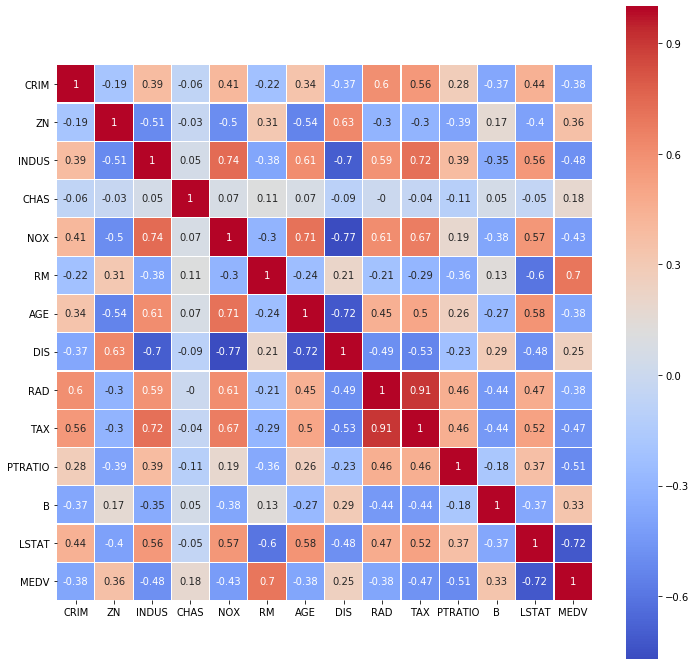

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)
plt.show()

#### Observation :

We need to select the features which are highly correlated with the target variable and less correlated with the other features.

1.INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV.

2.But,INDUS shows good correlation with TAX and LSAT which creates Multicollinearity.Therefore,INDUS can be avoided and can consider the remaining features.


### Creating a dataframe with only selected features :

In [13]:
data1 = data[['RM','TAX','PTRATIO','LSTAT','MEDV']]
data1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296,15.3,4.98,24.0
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,11.43,36.2


### Plotting pair plots :

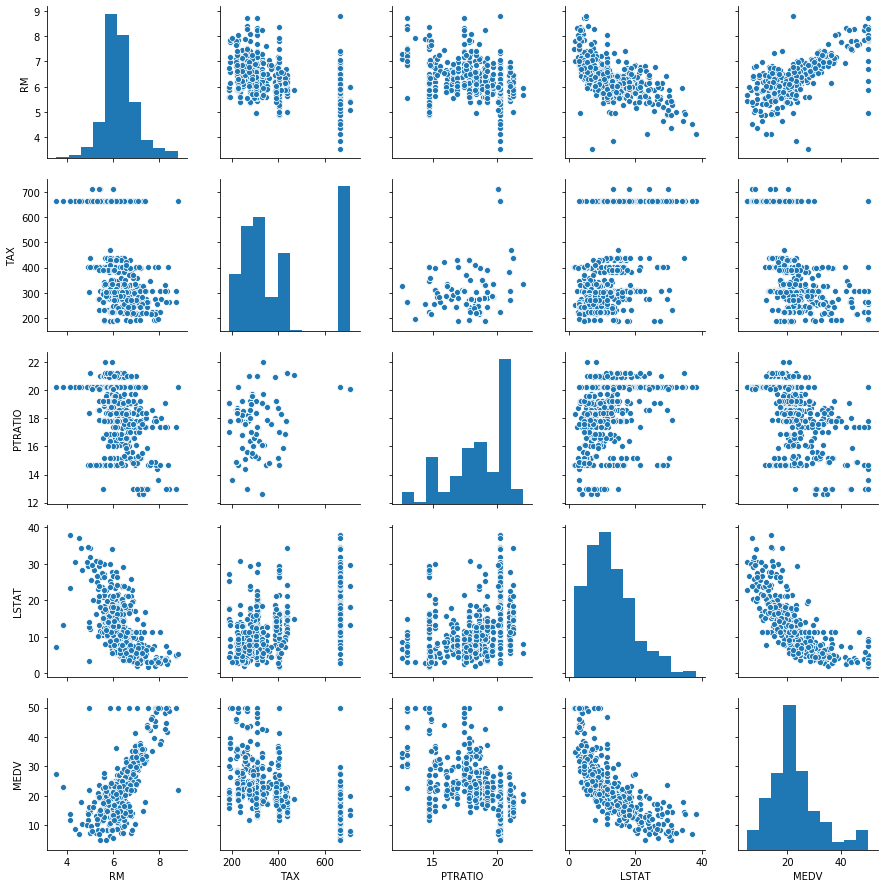

In [14]:
sns.pairplot(data=data1)
plt.show()

#### Observation :

We can see that RM and MEDV are quite normally distributed.

We can see that RM and LSTAT shows kind of good Linear relationship with MEDV.

There seems to have presence of some outliers in the dataset, we will study about them in some time.

### Description of the data :

In [15]:
data1.describe()

,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,6.284634,408.237154,18.455534,12.664625,22.532806
std,0.702617,168.537116,2.164946,7.017219,9.197104
min,3.561000,187.000000,12.600000,1.730000,5.000000
25%,5.885500,279.000000,17.400000,7.230000,17.025000
50%,6.208500,330.000000,19.050000,11.430000,21.200000
75%,6.623500,666.000000,20.200000,16.570000,25.000000
max,8.780000,711.000000,22.000000,37.970000,50.000000


## Exploratory Data Analysis(EDA) :

### Univariate and Multivariate Analysis :

### MEDV :

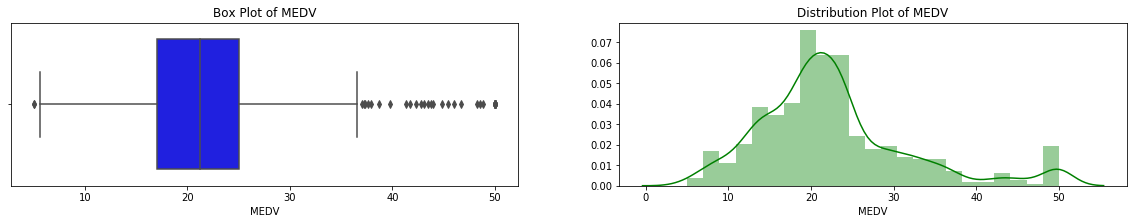

In [16]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(data1.MEDV,color='blue')
plt.title('Box Plot of MEDV')

plt.subplot(1,2,2)
sns.distplot(a=data1.MEDV,color='green')
plt.title('Distribution Plot of MEDV')
plt.show()

#### Observation :

From above two figures we can see observe that:

MEDV is normally distributed
It contains some extreme values which could be potential outliers
Next we are going to observe data points which lies outside wiskers.

Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR

Q3 -> Quartile 3, Under which 75% of data lies
Q1 -> Quartile 1, Under which 25% of data lies
IQR -> Inter-Quartile Range, Q3 - Q1

#### Handling ourliers of MEDV :

In [17]:
MEDV_Q3 = np.percentile(data1['MEDV'], 75)
MEDV_Q1 = np.percentile(data1['MEDV'], 25)
MEDV_IQR = MEDV_Q3 - MEDV_Q1
MEDV_UV = MEDV_Q3 + 1.5*MEDV_IQR
MEDV_LV = MEDV_Q1 - 1.5*MEDV_IQR

data1[data1['MEDV']<MEDV_LV]

,RM,TAX,PTRATIO,LSTAT,MEDV
398,5.453,666,20.2,30.59,5.0
405,5.683,666,20.2,22.98,5.0


#### Observation :
    
For these two low house prices, we can see that TAX = 666 which is very high for a house with approx 5 rooms.

For these two low house prices, we can see that LSTAT is also high.

#### Conclusion:

Since both TAX and LSTAT are negatively correlated to MEDV which means higher the TAX and LSTAT lower will be the house price and vica-versa.

I find it meaningful to have such low house prices.

Therefore, I will keep these data points.

In [18]:
data1[data1['MEDV']>MEDV_UV].sort_values(by=['MEDV','RM'])

,RM,TAX,PTRATIO,LSTAT,MEDV
190,6.951,398,15.2,5.10,37.0
179,6.980,193,17.8,5.04,37.2
291,7.148,245,19.2,3.56,37.3
226,8.040,307,17.4,11.43,37.6
182,7.155,193,17.8,4.82,37.9
97,8.069,276,18.0,4.21,38.7
180,7.765,193,17.8,7.56,39.8
157,6.943,403,14.7,4.59,41.3
232,8.337,307,17.4,2.47,41.7
202,7.610,348,14.7,3.11,42.3


#### Observation:

For house prices = 50, it is observed that number of Room ranges from 5 to 9 (approx.) which is quite unusual.

Also for these houses TAX ranges from low to high.

For houses price between 37 to less than 50, RM is higher than 75% of the total data points. Since RM is positively correlated to MEDV, so this could be reason for little higher house prices.

Also for these houses PTRATIO and LSTAT lies in 25% - 50% of the total observation respectively. Since PTRATIO and LSAT are negatively correlated to MEDV so this could be reason for little higher house prices.

#### Conclusion:

I am going to DROP ALL entries whose MEDV = 50 because I feel these entries are outliers and can create problem in having good predicitions.

I am going to keep all entries having MEDV between 37 to less than 50, since I could not observe any unusual behaviour for them.

In [19]:
print(f'Shape of dataset before remving Outliers: {data1.shape}')
data2 = data1[~(data1['MEDV']==50)]
print(f'Shape of dataset after remving Outliers: {data2.shape}')

Shape of dataset before remving Outliers: (506, 5)
Shape of dataset after remving Outliers: (490, 5)


### TAX :

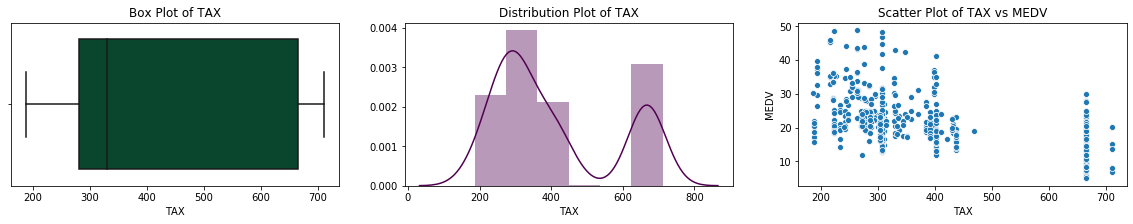

In [20]:
#Box Plot, Distribution Plot and Scatter Plot for TAX
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(data2.TAX,color='#005030')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a=data2.TAX,color='#500050')
plt.title('Distribution Plot of TAX')

plt.subplot(1,3,3)
sns.scatterplot(data2.TAX,data.MEDV)
plt.title('Scatter Plot of TAX vs MEDV')

plt.show()

#### Observation :

From above three figures we can observe that:

TAX is NOT normally distributed.

Though Boxplot does not show any outlier but there are some extreme TAX values in the dataset.

Also from the scatter plot we can observe that for these extreme TAX values, MEDV ranges from low to high.

In [21]:
temp_data = data2[data1['TAX']>600].sort_values(by=['RM','MEDV'])
temp_data.shape

(132, 5)

#### Observation :
There are total 132 entries in TAX mostly having value 666 which I thinks is a big number. Now lets deep dive inside them.

In [22]:
temp_data

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,666,20.2,7.12,27.5
367,3.863,666,20.2,13.33,23.1
406,4.138,666,20.2,23.34,11.9
374,4.138,666,20.2,37.97,13.8
384,4.368,666,20.2,30.63,8.8
414,4.519,666,20.2,36.98,7.0
412,4.628,666,20.2,34.37,17.9
386,4.652,666,20.2,28.28,10.5
388,4.880,666,20.2,30.62,10.2
373,4.906,666,20.2,34.77,13.8


In [23]:
temp_data.describe()

,RM,TAX,PTRATIO,LSTAT,MEDV
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.000689,667.704545,20.196212,18.828864,14.994697
std,0.712621,8.623365,0.019163,6.590380,5.405825
min,3.561000,666.000000,20.100000,5.290000,5.000000
25%,5.674250,666.000000,20.200000,14.175000,10.900000
50%,6.139500,666.000000,20.200000,17.910000,14.100000
75%,6.407250,666.000000,20.200000,23.052500,19.200000
max,8.780000,711.000000,20.200000,37.970000,29.800000


#### Observations:

RM for these entries lies between 3.5 to 8.78.

PTRATIO for almost all of these entries is same and equal to 20.20.

LSTAT for these entries lies between 2.96 to 37.97.

MEDV for these entries lies between 5 to 29.80.

All these observations are very unusual, it seems impossible to have such high TAX values for all these houses.

These values most likely missing values which were imputed casually by someone.

#### Conclusion:

Since LSTAT is most correlated to TAX as seen above in Heatmap, so I am going to replace those 132 TAX values with mean of remaining TAX values dividing in some intervals with the help of LSTAT.

Interval 1: TAX_10 -> Replacing extreme TAX values having LSTAT is between 0 to 10 with mean of other TAX values whose LSTAT is between 0 to 10.
    
Interval 2: TAX_20 -> Replacing extreme TAX values having LSTAT is between 10 to 20 with mean of other TAX values whose LSTAT is between 10 to 20.
    
Interval 3: TAX_30 -> Replacing extreme TAX values having LSTAT is between 20 to 30 with mean of other TAX values whose LSTAT is between 20 to 30.
    
Interval 4: TAX_40 -> Replacing extreme TAX values having LSTAT >= 30 with mean of other TAX values whose LSTAT >= 30.


In [24]:
TAX_10 = data2[(data2['TAX']<600) & (data2['LSTAT']>=0) & (data2['LSTAT']<10)]['TAX'].mean()
TAX_20 = data2[(data2['TAX']<600) & (data2['LSTAT']>=10) & (data2['LSTAT']<20)]['TAX'].mean()
TAX_30 = data2[(data2['TAX']<600) & (data2['LSTAT']>=20) & (data2['LSTAT']<30)]['TAX'].mean()
TAX_40 = data2[(data2['TAX']<600) & (data2['LSTAT']>=30)]['TAX'].mean()

indexes = list(data2.index)
for i in indexes:
    if data2['TAX'][i] > 600:
        if (0 <= data2['LSTAT'][i] < 10):
            data2.at[i,'TAX'] = TAX_10
        elif (10 <= data2['LSTAT'][i] < 20):
            data2.at[i,'TAX'] = TAX_20
        elif (20 <= data2['LSTAT'][i] < 30):
            data2.at[i,'TAX'] = TAX_30
        elif (data2['LSTAT'][i] >30):
            data2.at[i,'TAX'] = TAX_40

print('Values imputed successfully')

Values imputed successfully


In [25]:
#This show all those extreme TAX values are replaced successfully
data2[data2['TAX']>600]['TAX'].count()

0

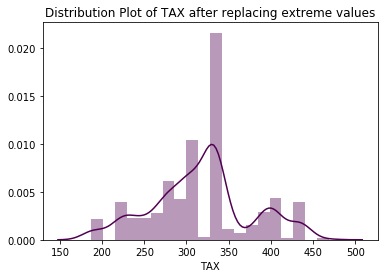

In [26]:
sns.distplot(a=data2.TAX,color='#500050')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.show()

### PTRATIO :

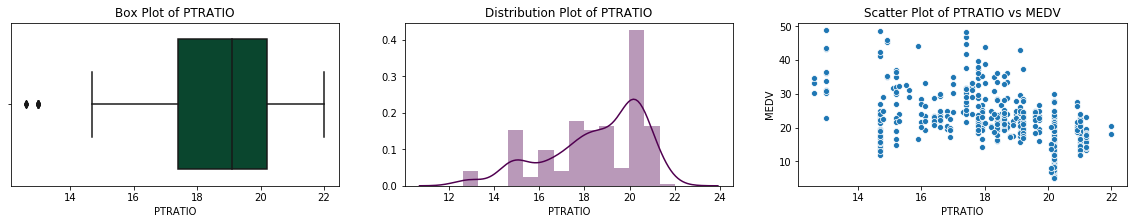

In [27]:
#Box Plot, Distribution Plot and Scatter Plot for PTRATIO
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(data2.PTRATIO,color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a=data2.PTRATIO,color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(data2.PTRATIO,data2.MEDV)
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()

#### Observations :

From above three figures we can observe that:

PTRATIO is NOT normally distributed

There are few low PRATIO values in the dataset.

In [28]:
data2[data2['PTRATIO']<14].sort_values(by=['LSTAT','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
268,7.470,264,13.0,3.16,43.5
196,7.287,329,12.6,4.08,33.3
262,8.398,264,13.0,5.91,48.8
198,7.274,329,12.6,6.62,34.6
259,6.842,264,13.0,6.90,30.1
261,7.520,264,13.0,7.26,43.1
258,7.333,264,13.0,7.79,36.0
264,7.206,264,13.0,8.10,36.5
197,7.107,329,12.6,8.61,30.3
260,7.203,264,13.0,9.59,33.8


#### Observations:

PTRATIO for all above data points is same.

RM and MEDV is increasing simultaneously, as RM and MEDV are positively correlated, which is fine.

As LSTAT increases MEDV decreases, which follows negative correlation.

#### Conclusion:

I don't observe any unusual behaviour for these data points. Therefore, I will keep them.

### LSTAT :

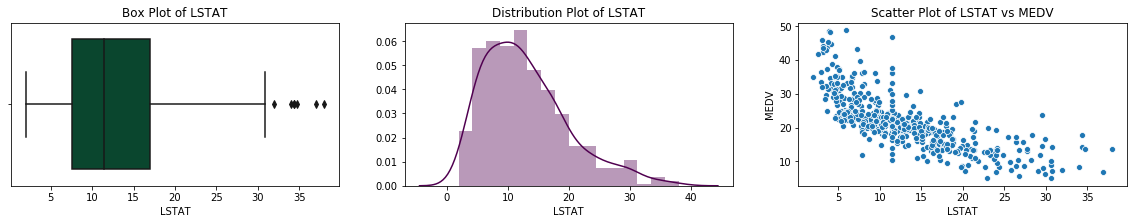

In [29]:
#Box Plot, Distribution Plot and Scatter Plot for LSTAT
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(data2.LSTAT,color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=data2.LSTAT,color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(data2.LSTAT,data2.MEDV)
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

#### Observations :

From above three figures we can observe that:

LSTAT is normally distributed and skewed to right.

There are some high LSTAT values in the dataset which we will analyse.

In [30]:
LSTAT_Q3 = np.percentile(data1['MEDV'], 75)
LSTAT_Q1 = np.percentile(data2['MEDV'], 25)
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
LSTAT_UV = LSTAT_Q3 + 1.5*LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5*LSTAT_IQR

data2[data2['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')

,RM,TAX,PTRATIO,LSTAT,MEDV
374,4.138,335,20.2,37.97,13.8


### RM :

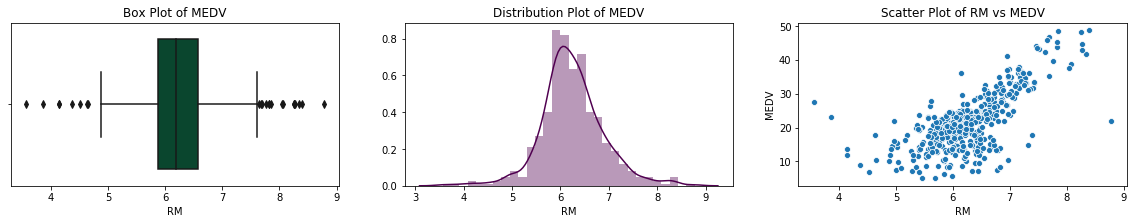

In [31]:
#Box Plot, Distribution Plot and Scatter Plot for RM
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(data2.RM,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,3,2)
sns.distplot(a=data2.RM,color='#500050')
plt.title('Distribution Plot of MEDV')

plt.subplot(1,3,3)
sns.scatterplot(data2.RM,data2.MEDV)
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

#### Observations :

From above three figures we can observe that:
        
RM is normally distributed .

There are some low and high RM values in the dataset which we will analyse.

Scatter plot of RM vs MEDV show good Positive Linear Relationship.

In [32]:
RM_Q3 =np.percentile(data1['RM'], 75)
RM_Q1 =np.percentile(data1['RM'], 25)
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

data2[data2['RM']<RM_LV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,294,20.2,7.12,27.5
367,3.863,330,20.2,13.33,23.1
406,4.138,338,20.2,23.34,11.9
374,4.138,335,20.2,37.97,13.8
384,4.368,335,20.2,30.63,8.8
414,4.519,335,20.2,36.98,7.0
412,4.628,335,20.2,34.37,17.9
386,4.652,338,20.2,28.28,10.5


#### Observations:

I am more concerned about two data points (row index - 365 & 367) where MEDV is higher while RM is very low, though RM and MEDV are positively correlated.
Also for these two data points TAX and PTRATIO are above 50% of data points respectively, though both are negatively correlated to MEDV.
For rest data points, I don't see any unusual behaviour.

#### Conclusion:

I am going to delete those two data points (row index - 365 & 367) as it may influence the prediction capability of our model.
Also I am going to keep all other points.

In [33]:
print(f'Shape of dataset before removing data points: {data2.shape}')
data3 = data2.drop(axis=0,index=[365,367])
print(f'Shape of dataset before removing data points: {data3.shape}')

Shape of dataset before removing data points: (490, 5)
Shape of dataset before removing data points: (488, 5)


In [34]:
data3[data3['RM']>RM_UV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
180,7.765,193,17.8,7.56,39.8
98,7.820,276,18.0,3.57,43.8
280,7.820,216,14.9,3.76,45.4
203,7.853,224,14.7,3.81,48.5
226,8.040,307,17.4,11.43,37.6
97,8.069,276,18.0,4.21,38.7
233,8.247,307,17.4,3.95,48.3
253,8.259,330,19.1,3.54,42.8
224,8.266,307,17.4,4.14,44.8
232,8.337,307,17.4,2.47,41.7


#### Observations:

In the above data points, I am more concerned about one data point only (row index - 364) where MEDV is very low while RM is very high, though RM and MEDV are positively correlated.
Also for this data point LSTAT is low and MEDV is also low, though both are negatively correlated.
For rest data points, I don't see any unusual behaviour.

#### Conclusion:

I am going to delete the data point (row index - 364) as I believe this could be human error while inputting the data.
Also I am going to keep all other points.

In [35]:
print(f'Shape of dataset before removing data points: {data3.shape}')
data3 = data3.drop(axis=0,index=[364])
print(f'Shape of dataset before removing data points: {data3.shape}')

Shape of dataset before removing data points: (488, 5)
Shape of dataset before removing data points: (487, 5)


### Separating the features and target variable :

In [36]:
X = data3.iloc[:,0:4].values
y = data3.iloc[:,-1:].values

### Splitting Dataset into Train and Test Set :

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (389, 4)
Shape of X_test = (98, 4)
Shape of y_train = (389, 1)
Shape of y_test = (98, 1)


### Standardizing the data :


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

### Building Multiple Linear Regression :

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train_std, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[21.70359897]
[[ 2.88108972 -1.09070237 -1.96236443 -2.92684086]]


In [41]:
y_pred = regressor.predict(X_test_std)

In [42]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,22.8,23.546205
1,29.6,28.094359
2,12.7,16.173698
3,20.3,18.982664
4,14.2,17.679194
5,18.3,17.176048
6,24.4,23.564113
7,25.0,25.020452
8,23.9,25.055581
9,23.1,23.762676


### Model Evaluation :

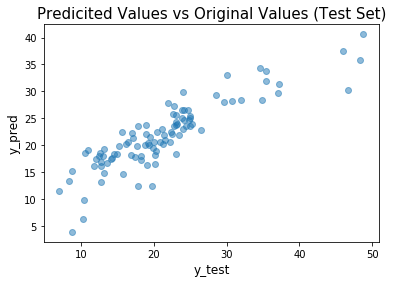

In [43]:
plt.scatter(x=y_test,y=y_pred,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

#### Observations :

In the above scatter plot we can see that the diagonal line is not that straight, which represents the differences in the actual and predictions.

### Residual plot :

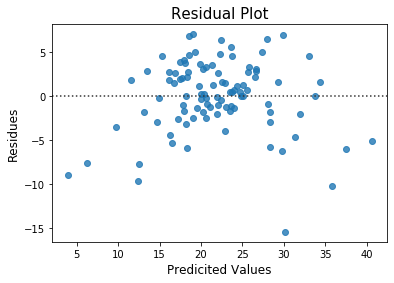

In [44]:
sns.residplot(y_pred,(y_pred-y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

### Distribution of Residuals :

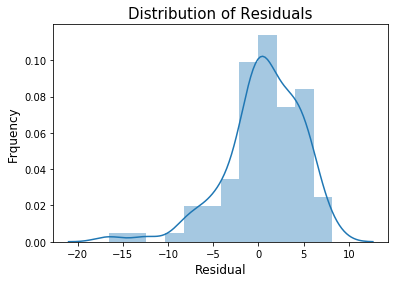

In [45]:
sns.distplot(y_pred-y_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

#### Observations:

Distribution of Residuals Plot shows residuals are quite normally distributed.

From above Residual Plot, I do not found any significant pattern in residues (errors or predicition).

I can conclude that our model is neither under fitting nor over fitting the data.

### Metrics :

In [46]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
print(N,p)
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

98 4
R^2 = 0.7465006424047427
Adjusted R^2 = 0.7355974442286026


#### Observations :

R square value above is calcualted on Test Set, though it is not very good but still it explains quite good linear relationship among independent variable and dependent variables.

In [47]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

Mean Squared Error: 18.298333254482205
Mean Absolute Error: 3.2423195376901885
Root Mean Squared Error: 4.27765511168002


### Saving the model for future purpose :

In [48]:
from sklearn.externals import joblib
joblib.dump(regressor,'Linear_Reg.pkl',compress=3)

['Linear_Reg.pkl']

### Building Decision Tree Regressor :


In [49]:
X_dt = data3.iloc[:,:-1].values
y_dt = data3.iloc[:,-1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X_dt,y_dt,test_size=0.2,random_state=42)

print(f"Shape of X_train_dt = {X_train_dt.shape}")
print(f"Shape of X_test_dt = {X_test_dt.shape}")
print(f"Shape of y_train_dt = {y_train_dt.shape}")
print(f"Shape of y_test_dt = {y_test_dt.shape}")

Shape of X_train_dt = (389, 4)
Shape of X_test_dt = (98, 4)
Shape of y_train_dt = (389,)
Shape of y_test_dt = (98,)


### Standardizing the data :

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std_DT=sc.fit_transform(X_train_dt)
X_test_std_DT=sc.transform(X_test_dt)

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_std_DT,y_train_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
y_pred_DT = dt.predict(X_test_std_DT)


In [54]:
df = pd.DataFrame({'Actual': y_test_dt.flatten(), 'Predicted': y_pred_DT.flatten()})
df

,Actual,Predicted
0,22.8,22.1
1,29.6,28.5
2,12.7,23.2
3,20.3,22.5
4,14.2,13.8
5,18.3,19.9
6,24.4,22.2
7,25.0,23.7
8,23.9,20.5
9,23.1,20.5


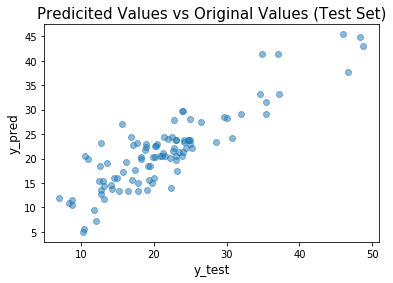

In [55]:
plt.scatter(x=y_test_dt,y=y_pred_DT,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

### Residual Plot :

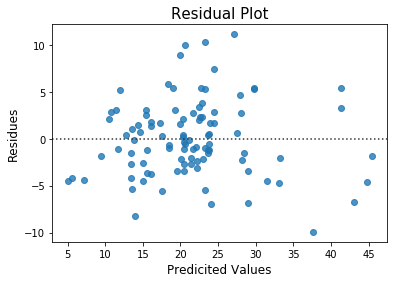

In [56]:
sns.residplot(y_pred_DT,(y_pred_DT-y_test_dt))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

### Distribution of residuals :

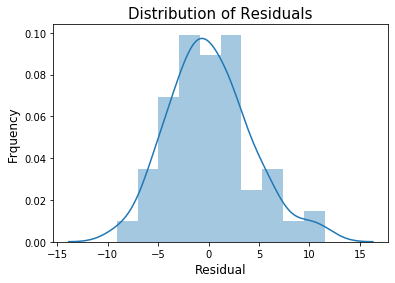

In [57]:
sns.distplot(y_pred_DT-y_test_dt)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

#### Observations:

Distribution of Residuals Plot shows residuals are normally distributed.

From above Residual Plot, I do not found any significant pattern in residues (errors or predicition).

I can conclude that our model is neither under fitting nor over fitting the data.

### Metrics :

In [58]:
from sklearn import metrics
r2_dt= metrics.r2_score(y_test_dt,y_pred_DT)
N,p = X_test.shape
adj_r2_dt = 1-((1-r2_dt)*(N-1))/(N-p-1)
print(f'R^2 = {r2_dt}')
print(f'Adjusted R^2 = {adj_r2_dt}')

R^2 = 0.7740506272875026
Adjusted R^2 = 0.7643323746977178


#### Observations :
R square value above is calcualted on Test Set, though it is not very good but still its better than our Multiple Linear Regression Score. This means that Decision Tree model fits better than Multiple Linear Regression Model.

In [59]:
from sklearn import metrics
mse_dt = metrics.mean_squared_error(y_test_dt,y_pred_DT)
mae_dt = metrics.mean_absolute_error(y_test_dt,y_pred_DT)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_dt,y_pred_DT))
print(f'Mean Squared Error: {mse_dt}',f'Mean Absolute Error: {mae_dt}',f'Root Mean Squared Error: {rmse_dt}',sep='\n')

Mean Squared Error: 16.309693877551016
Mean Absolute Error: 3.170408163265306
Root Mean Squared Error: 4.038526201171786


#### Observations :

Conclusion:

Decision Tree Model gives better R square than one we got in Linear Regression, it means that this model is able to predict house prices more accurate than Linear Regression and we may use this model for predicting the house prices.

### Saving the model for future purpose :

In [60]:
joblib.dump(dt,'Decision_Tree.pkl',compress=3)

['Decision_Tree.pkl']

### Building Random Forest Regressor :

In [61]:
X_rf = data3.iloc[:,:-1].values
y_rf = data3.iloc[:,-1].values

In [62]:
from sklearn.model_selection import train_test_split
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(X_rf,y_rf,test_size=0.2,random_state=42)

print(f"Shape of X_train_rf = {X_train_rf.shape}")
print(f"Shape of X_test_rf = {X_test_rf.shape}")
print(f"Shape of y_train_rf = {y_train_rf.shape}")
print(f"Shape of y_test_rf = {y_test_rf.shape}")

Shape of X_train_rf = (389, 4)
Shape of X_test_rf = (98, 4)
Shape of y_train_rf = (389,)
Shape of y_test_rf = (98,)


### Standardizing the data :

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std_RF=sc.fit_transform(X_train_rf)
X_test_std_RF=sc.transform(X_test_rf)

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_std_RF,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [65]:
y_pred_rf = rf.predict(X_test_std_RF)

In [66]:
df = pd.DataFrame({'Actual': y_test_rf.flatten(), 'Predicted': y_pred_rf.flatten()})
df

,Actual,Predicted
0,22.8,22.611
1,29.6,30.660
2,12.7,20.043
3,20.3,20.579
4,14.2,15.413
5,18.3,20.882
6,24.4,23.308
7,25.0,25.639
8,23.9,24.362
9,23.1,22.282


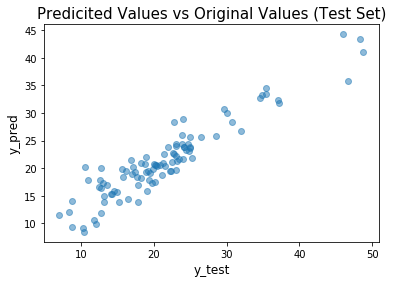

In [67]:
plt.scatter(x=y_test_rf,y=y_pred_rf,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

### Residual plot :

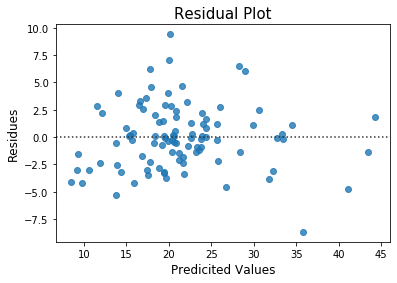

In [68]:
sns.residplot(y_pred_rf,(y_pred_rf-y_test_rf))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

### Distribution of residuals :

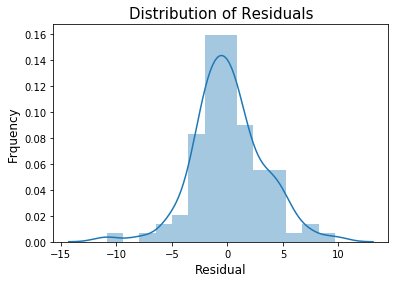

In [69]:
sns.distplot(y_pred_rf-y_test_rf)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()


### Observations:

Distribution of Residuals Plot shows residuals are normally distributed.

From above Residual Plot, I do not found any significant pattern in residues (errors or predicition).

I can conclude that our model is neither under fitting nor over fitting the data.

### Metrics :

In [70]:
from sklearn import metrics
r2_rf= metrics.r2_score(y_test_rf,y_pred_rf)
N,p = X_test_dt.shape
adj_r2_rf = 1-((1-r2_rf)*(N-1))/(N-p-1)
print(f'R^2 = {r2_rf}')
print(f'Adjusted R^2 = {adj_r2_rf}')

R^2 = 0.8640412763843184
Adjusted R^2 = 0.8581935893470848


#### Observations :

R square value above is calcualted on Test Set, though it is not very good but still its better than our Decision Tree Score. This means that Random Forest model fits better than Decision Tree Model.

In [71]:
from sklearn import metrics
mse_rf = metrics.mean_squared_error(y_test_rf,y_pred_rf)
mae_rf = metrics.mean_absolute_error(y_test_rf,y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_rf,y_pred_rf))
print(f'Mean Squared Error: {mse_rf}',f'Mean Absolute Error: {mae_rf}',f'Root Mean Squared Error: {rmse_rf}',sep='\n')

Mean Squared Error: 9.813902714285723
Mean Absolute Error: 2.33308163265306
Root Mean Squared Error: 3.132714911109168


From above Evaluation Metrices, we can notice that Root Mean Squared Error is low for our Random Forest Model and that is good thing for us. Also all these error scores are less then Decision Tree and Linear Regression.

#### Conclusion:

Random Forest Model gives better R square than both the models we made earlier, it means that this model is able to predict house prices more accurate than previous both models and we may use this model for predicting the house prices.

### Saving the model for future purpose :

In [72]:
joblib.dump(rf,'Random_Forest.pkl',compress=3)

['Random_Forest.pkl']

### Comparision of model using Pretty Table :

In [73]:
from prettytable import PrettyTable

In [74]:
x=PrettyTable()
x.field_names=['Model_Name','R Square','Adj_R_Square','MSE','MAE','RMSE']

In [76]:
x.add_row(['Linear_Reg',0.74,0.73,18.29,3.24,4.27])
x.add_row(['Decisions_Tree_Reg',0.77,0.76,16.30,3.17,4.03])
x.add_row(['Random_Forest_Reg',0.86,0.85,9.81,2.33,3.13])

In [77]:
print(x)

+--------------------+----------+--------------+-------+------+------+
|     Model_Name     | R Square | Adj_R_Square |  MSE  | MAE  | RMSE |
+--------------------+----------+--------------+-------+------+------+
|     Linear_Reg     |   0.74   |     0.73     | 18.29 | 3.24 | 4.27 |
| Decisions_Tree_Reg |   0.77   |     0.76     |  16.3 | 3.17 | 4.03 |
| Random_Forest_Reg  |   0.86   |     0.85     |  9.81 | 2.33 | 3.13 |
+--------------------+----------+--------------+-------+------+------+


### Conclusions :

Form the pretty table,we can see that <b>Random Forest Regressor</b> has more R square and Adj Square and less errors than others.Therefore,we will go ahead with <b>Random Forest Regressor</b>.